In [1]:
import pandas as pd
import numpy as np
import time
import os

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(color_codes=True)

from helpers import valid_elo, is_classical

In [33]:
elo_ratings = []
centipawn_losses = []
for filename in os.listdir('processed_data'):
    data = np.load(f'processed_data/{filename}', allow_pickle=True)
    for game in data:
        white_elo = game['white_elo']
        black_elo = game['black_elo']
        if valid_elo(white_elo):
            white_cp_losses = game['white_cp_losses']
            centipawn_losses.extend(white_cp_losses)
            elo_ratings.extend([white_elo]*len(white_cp_losses))

        if valid_elo(black_elo):
            black_cp_losses = game['black_cp_losses']
            centipawn_losses.extend(black_cp_losses)
            elo_ratings.extend([black_elo]*len(black_cp_losses))


/Users/axeloh/Koding/chess/centipawn_loss_analyzer/venv/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/axeloh/Koding/chess/centipawn_loss_analyzer/venv/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/axeloh/Koding/chess/centipawn_loss_analyzer/venv/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
centipawn_metrics = []

for filename in os.listdir('processed_data'):
    data = np.load(f'processed_data/{filename}', allow_pickle=True)
    for game in data:
        event = game['event']
        if not is_classical(event):
            continue
        
        date = game['date']
        white_player = game['white_player']
        white_elo = game['white_elo']
        black_player = game['black_player']
        black_elo = game['black_elo']
        

        if valid_elo(white_elo):
            metrics = {}
            metrics['event'] = event
            metrics['date'] = date
            metrics['player'] = white_player
            metrics['elo'] = white_elo
            metrics['color'] = 'white'
            metrics['opponent'] = black_player
            metrics['result'] = 'won' if game['result'] == '1-0' else ('lost' if game['result'] == '0-1' else 'draw')
            cp_losses = game['white_cp_losses']
            metrics['avg_cp_loss'] = np.mean(cp_losses)
            metrics['std_cp_loss'] = np.std(cp_losses)
            centipawn_metrics.append(metrics)

        if valid_elo(black_elo):
            metrics = {}
            metrics['event'] = event
            metrics['date'] = date
            metrics['player'] = black_player
            metrics['elo'] = black_elo
            metrics['color'] = 'black'
            metrics['opponent'] = white_player
            metrics['result'] = 'won' if game['result'] == '0-1' else ('lost' if game['result'] == '1-0' else 'draw')
            cp_losses = game['black_cp_losses']
            metrics['avg_cp_loss'] = np.mean(cp_losses)
            metrics['std_cp_loss'] = np.std(cp_losses)
            centipawn_metrics.append(metrics)


/Users/axeloh/Koding/chess/centipawn_loss_analyzer/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/axeloh/Koding/chess/centipawn_loss_analyzer/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/axeloh/Koding/chess/centipawn_loss_analyzer/venv/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/axeloh/Koding/chess/centipawn_loss_analyzer/venv/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/axeloh/Koding/chess/centipawn_loss_analyzer/venv/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: i

In [3]:
df = pd.DataFrame(centipawn_metrics)
display(df.head())
df.to_csv('games_with_cp_metrics.csv')

,event,date,player,elo,color,opponent,result,avg_cp_loss,std_cp_loss
0,Wch U12,1994.??.??,"Bacrot, Etienne",2255,white,"Aronian, Levon",lost,53.325000,81.589334
1,Bucharest,1995.??.??,"Khachian, Melikset",2400,white,"Aronian, Levon",draw,14.700000,18.286881
2,Bucharest,1995.??.??,"Aronian, Levon",2330,black,"Khachian, Melikset",draw,12.700000,11.756275
3,Bucharest,1995.??.??,"Badea, Bela",2490,white,"Aronian, Levon",draw,80.300000,180.906081
4,Bucharest,1995.??.??,"Aronian, Levon",2330,black,"Badea, Bela",draw,72.333333,186.081225


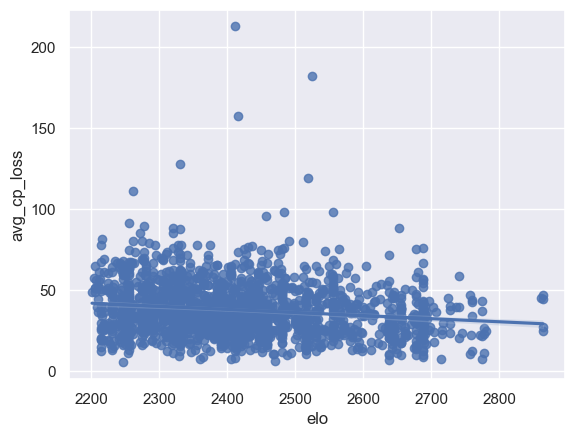

In [4]:
ax = sns.regplot(x='elo', y='avg_cp_loss', data=df)

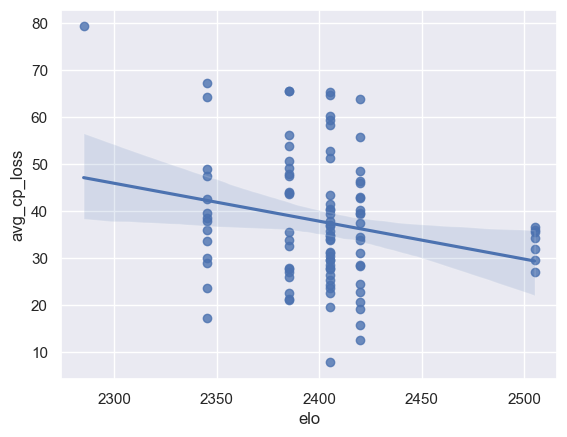

In [5]:
player_df = df[df['player'].str.contains('Anand')].sort_values(by=['elo'])
ax = sns.regplot(x='elo', y='avg_cp_loss', data=player_df)

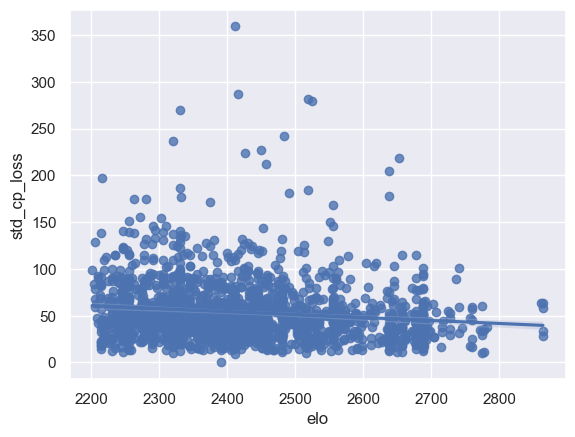

In [6]:
ax = sns.regplot(x='elo', y='std_cp_loss', data=df)